In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 
import geopandas as gpd

In [13]:
gebiete = gpd.read_file("MunichModel_shape/Gebiete.shp")
abschnitte = gpd.read_file("MunichModel_shape/Abschnitte.shp")
knoten = gpd.read_file("MunichModel_shape/Knoten.shp")

In [14]:
knoten["clear_name"] = ["Schmidbartlangerstr.", 
                  "Schenkendorfstr.", 
                  "Botanischer\nGarten", 
                  "Gräfelfinger\nStr.", #3
                  "Am\nLangwieder\nBach", #4
                  "Neue\nMessstelle 2", 
                  "WWT Gut Großlappen", 
                  "Gyßlinger Becken", #7
                  "Neue\nMessstelle 1", 
                  "WWT Gut Marienhof", #9
                  "Gesamt",
                  "Leopoldstr.", #11
                  "Neue\nMessstelle 4", 
                  "Zulauf\nGut Großlappen", 
                  "Savitstr.",
                  "Wintersteinstr.", ]

knoten["name"] = knoten.clear_name.apply(lambda x: manhole_clear_names[x])

/tmp/ipykernel_33270/3099231562.py:42: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


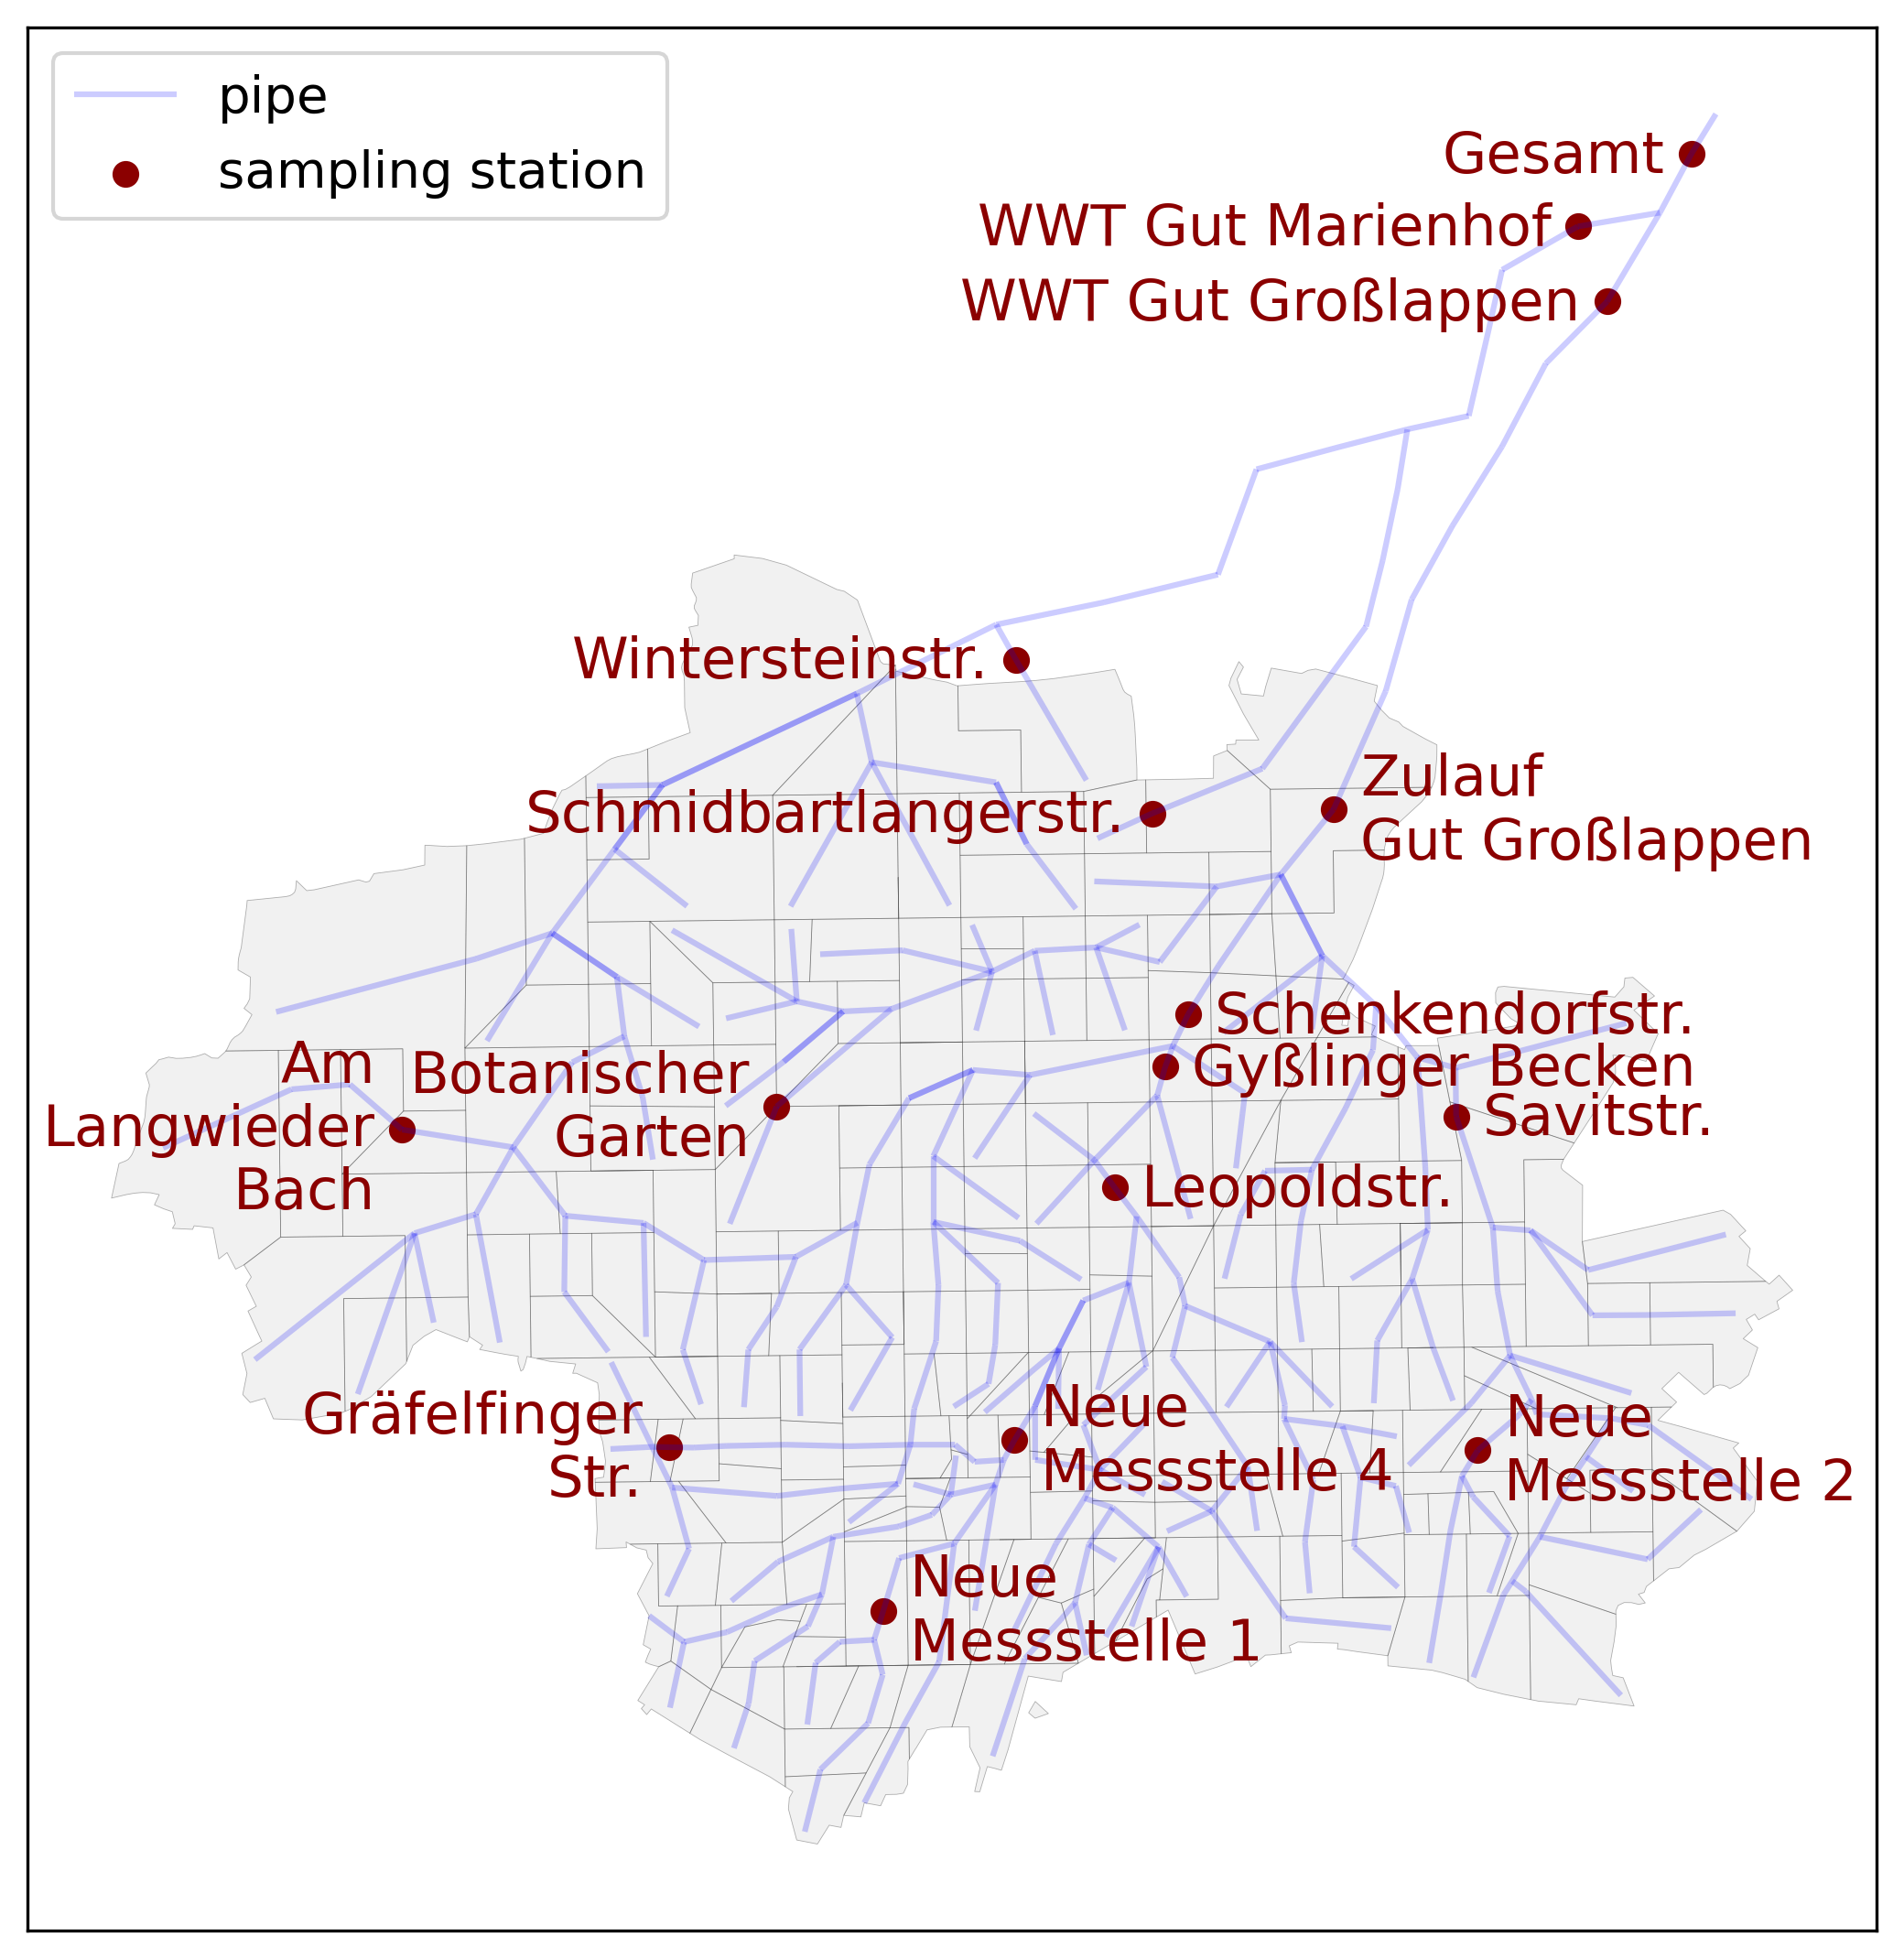

In [4]:
fig, ax = plt.subplots(figsize=(10,9), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.2, label='Gebiete', alpha=0.3)
abschnitte.plot(ax=ax, color='blue', label='pipe', alpha=0.2)
knoten.plot(ax=ax, color='darkred', label='sampling station')

txt_color = "darkred"

# orientation left of point
for idx, row in knoten.iloc[[0,6,9,10,15]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -5), textcoords="offset points", ha="right", color=txt_color)

# orientation right of point
for idx, row in knoten.iloc[[1,7,11, 14]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color)

# left three rows
for idx, row in knoten.iloc[[4]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -21), ha="right", textcoords="offset points", color=txt_color)

# left two rows
for idx, row in knoten.iloc[[2,3]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -13), ha="right", textcoords="offset points", color=txt_color)

# right two rows
for idx, row in knoten.iloc[[5,8,12,13]].iterrows():
    ax.annotate(text=row['clear_name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -13), textcoords="offset points", color=txt_color)


ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.set

plt.legend()
plt.savefig("../plots/overview_maps/MunichModel_clearname.png", dpi=300, bbox_inches='tight')

/tmp/ipykernel_33270/1790324227.py:27: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


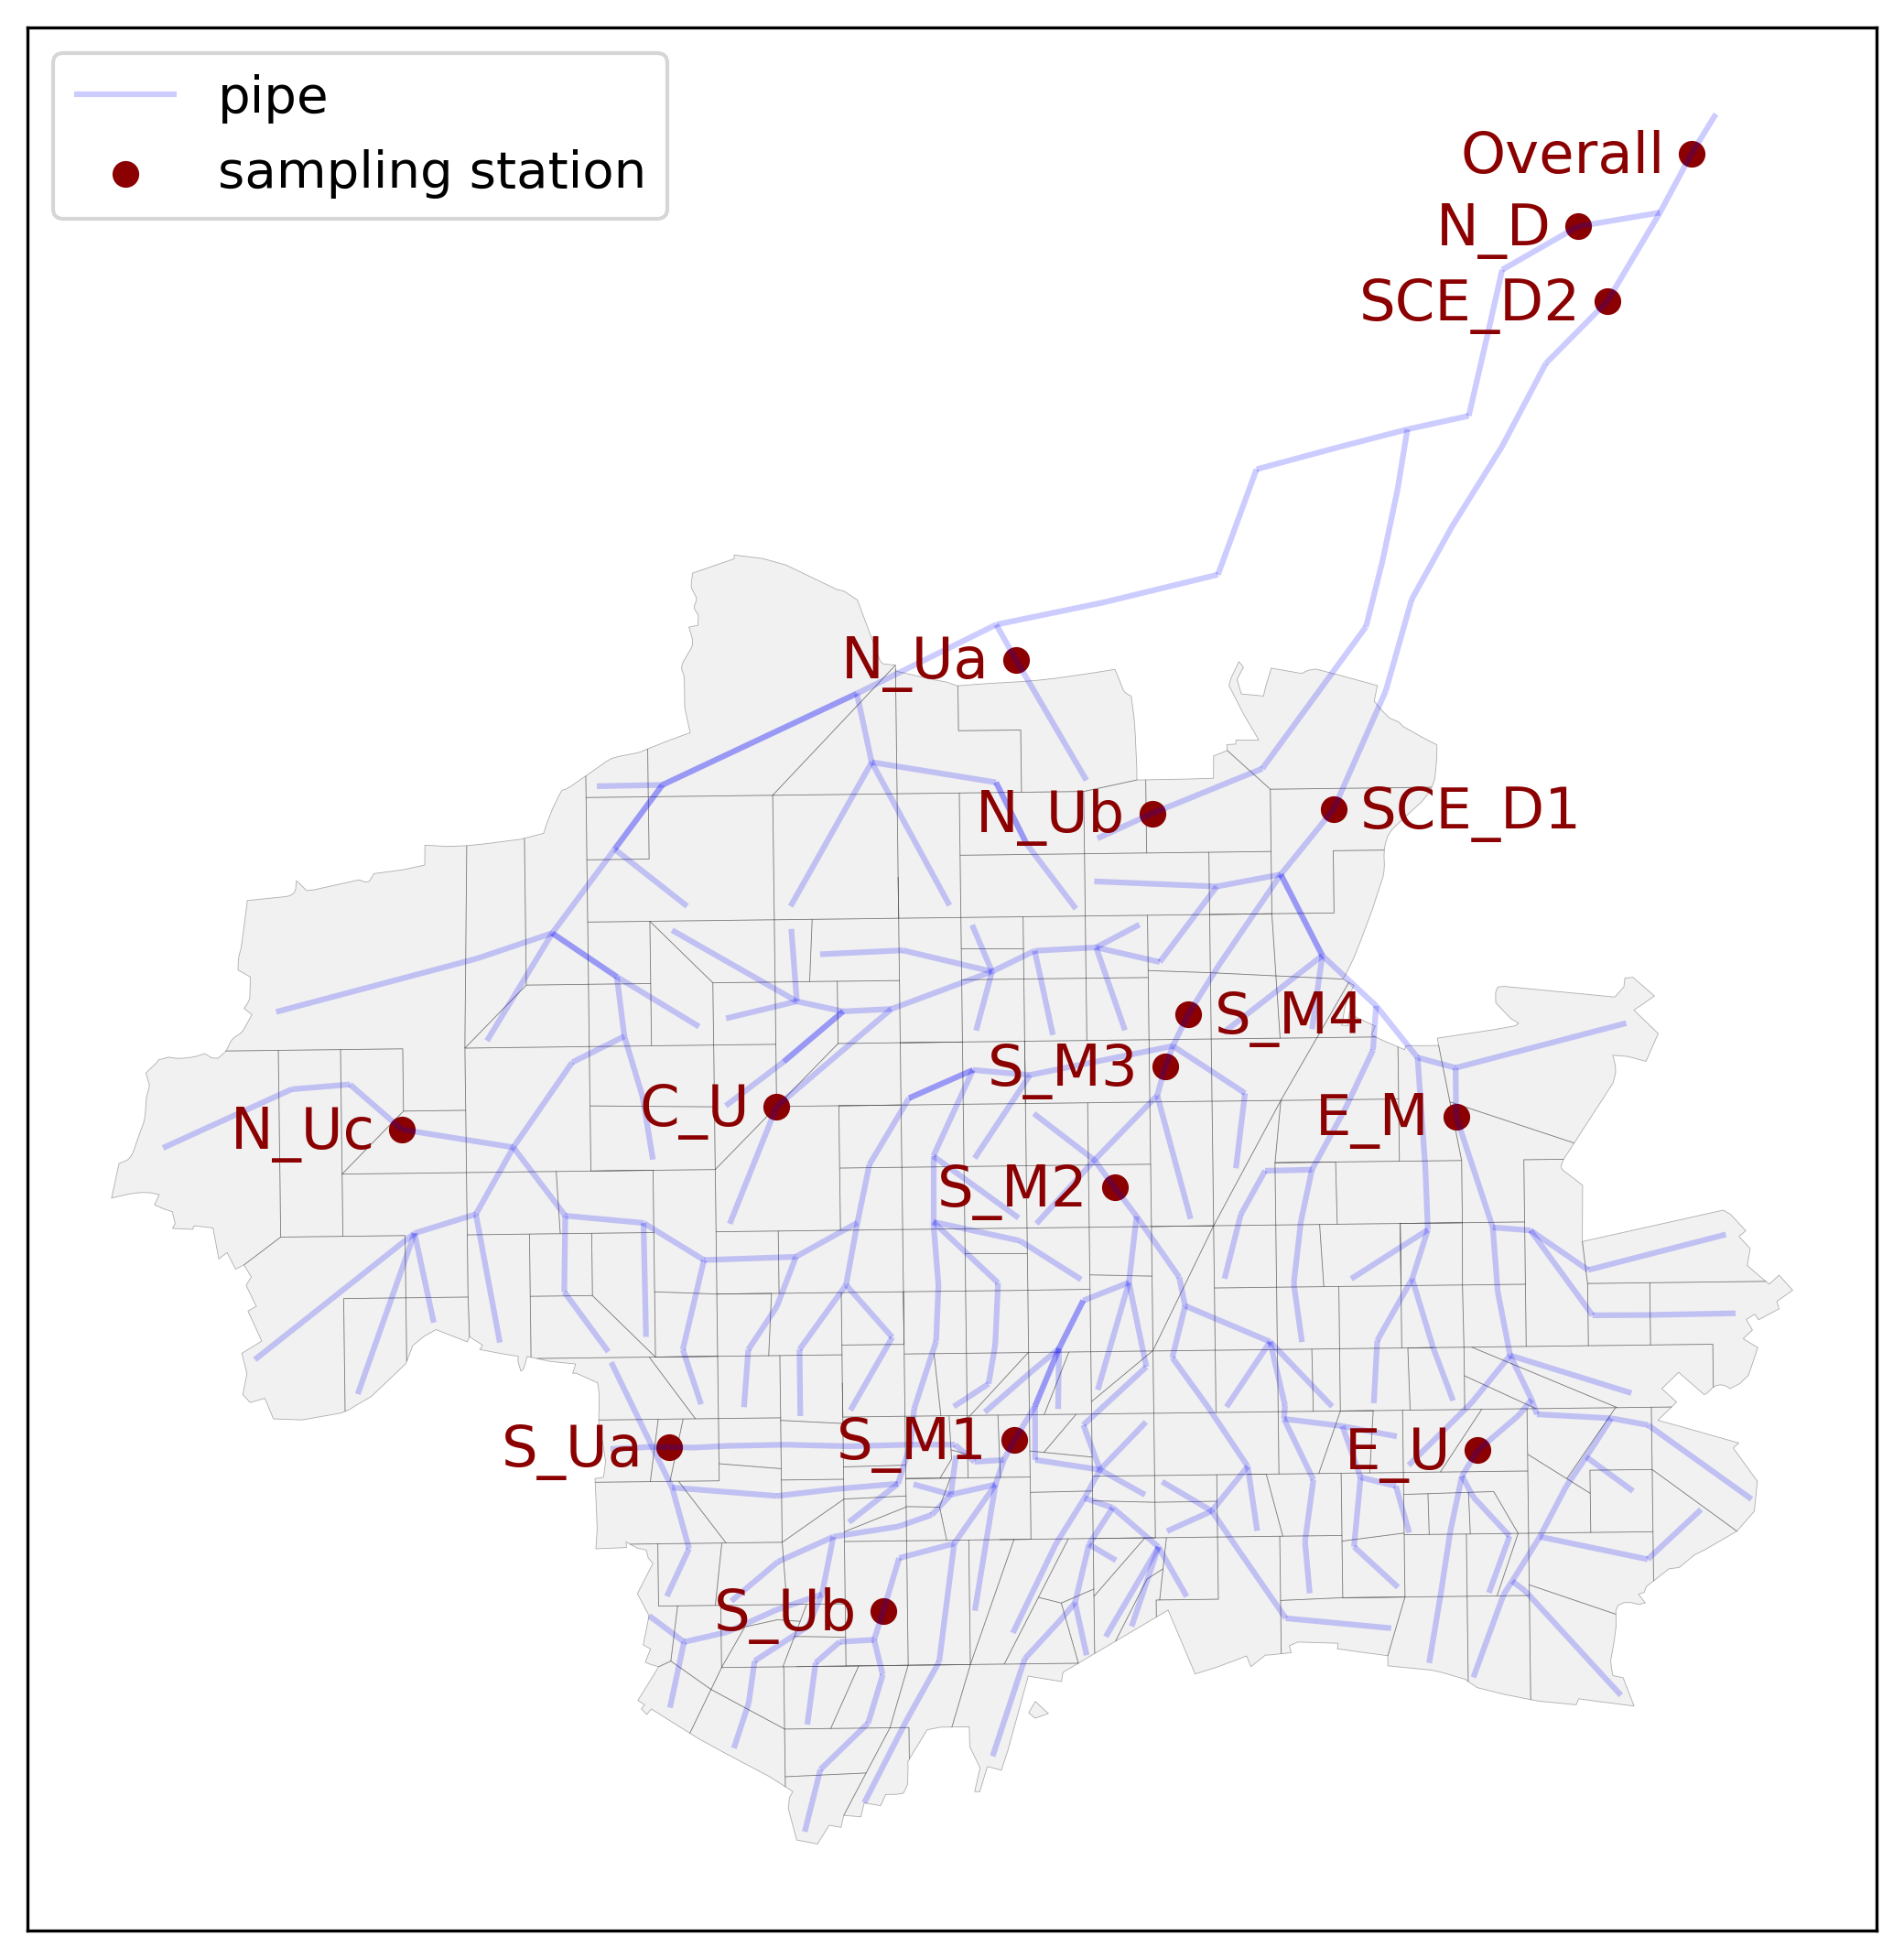

In [5]:
fig, ax = plt.subplots(figsize=(10,9), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.2, label='Gebiete', alpha=0.3)
abschnitte.plot(ax=ax, color='blue', label='pipe', alpha=0.2)
knoten.plot(ax=ax, color='darkred', label='sampling station')

txt_color = "darkred"

# orientation left of point
for idx, row in knoten.iloc[[0,2,3,4,5,6,7,8,9,10,11,12,14,15]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -5), textcoords="offset points", ha="right", color=txt_color)

# orientation right of point
for idx, row in knoten.iloc[[1,13]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color)


ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.set

plt.legend()
plt.savefig("../plots/overview_maps/MunichModel.png", dpi=300, bbox_inches='tight')

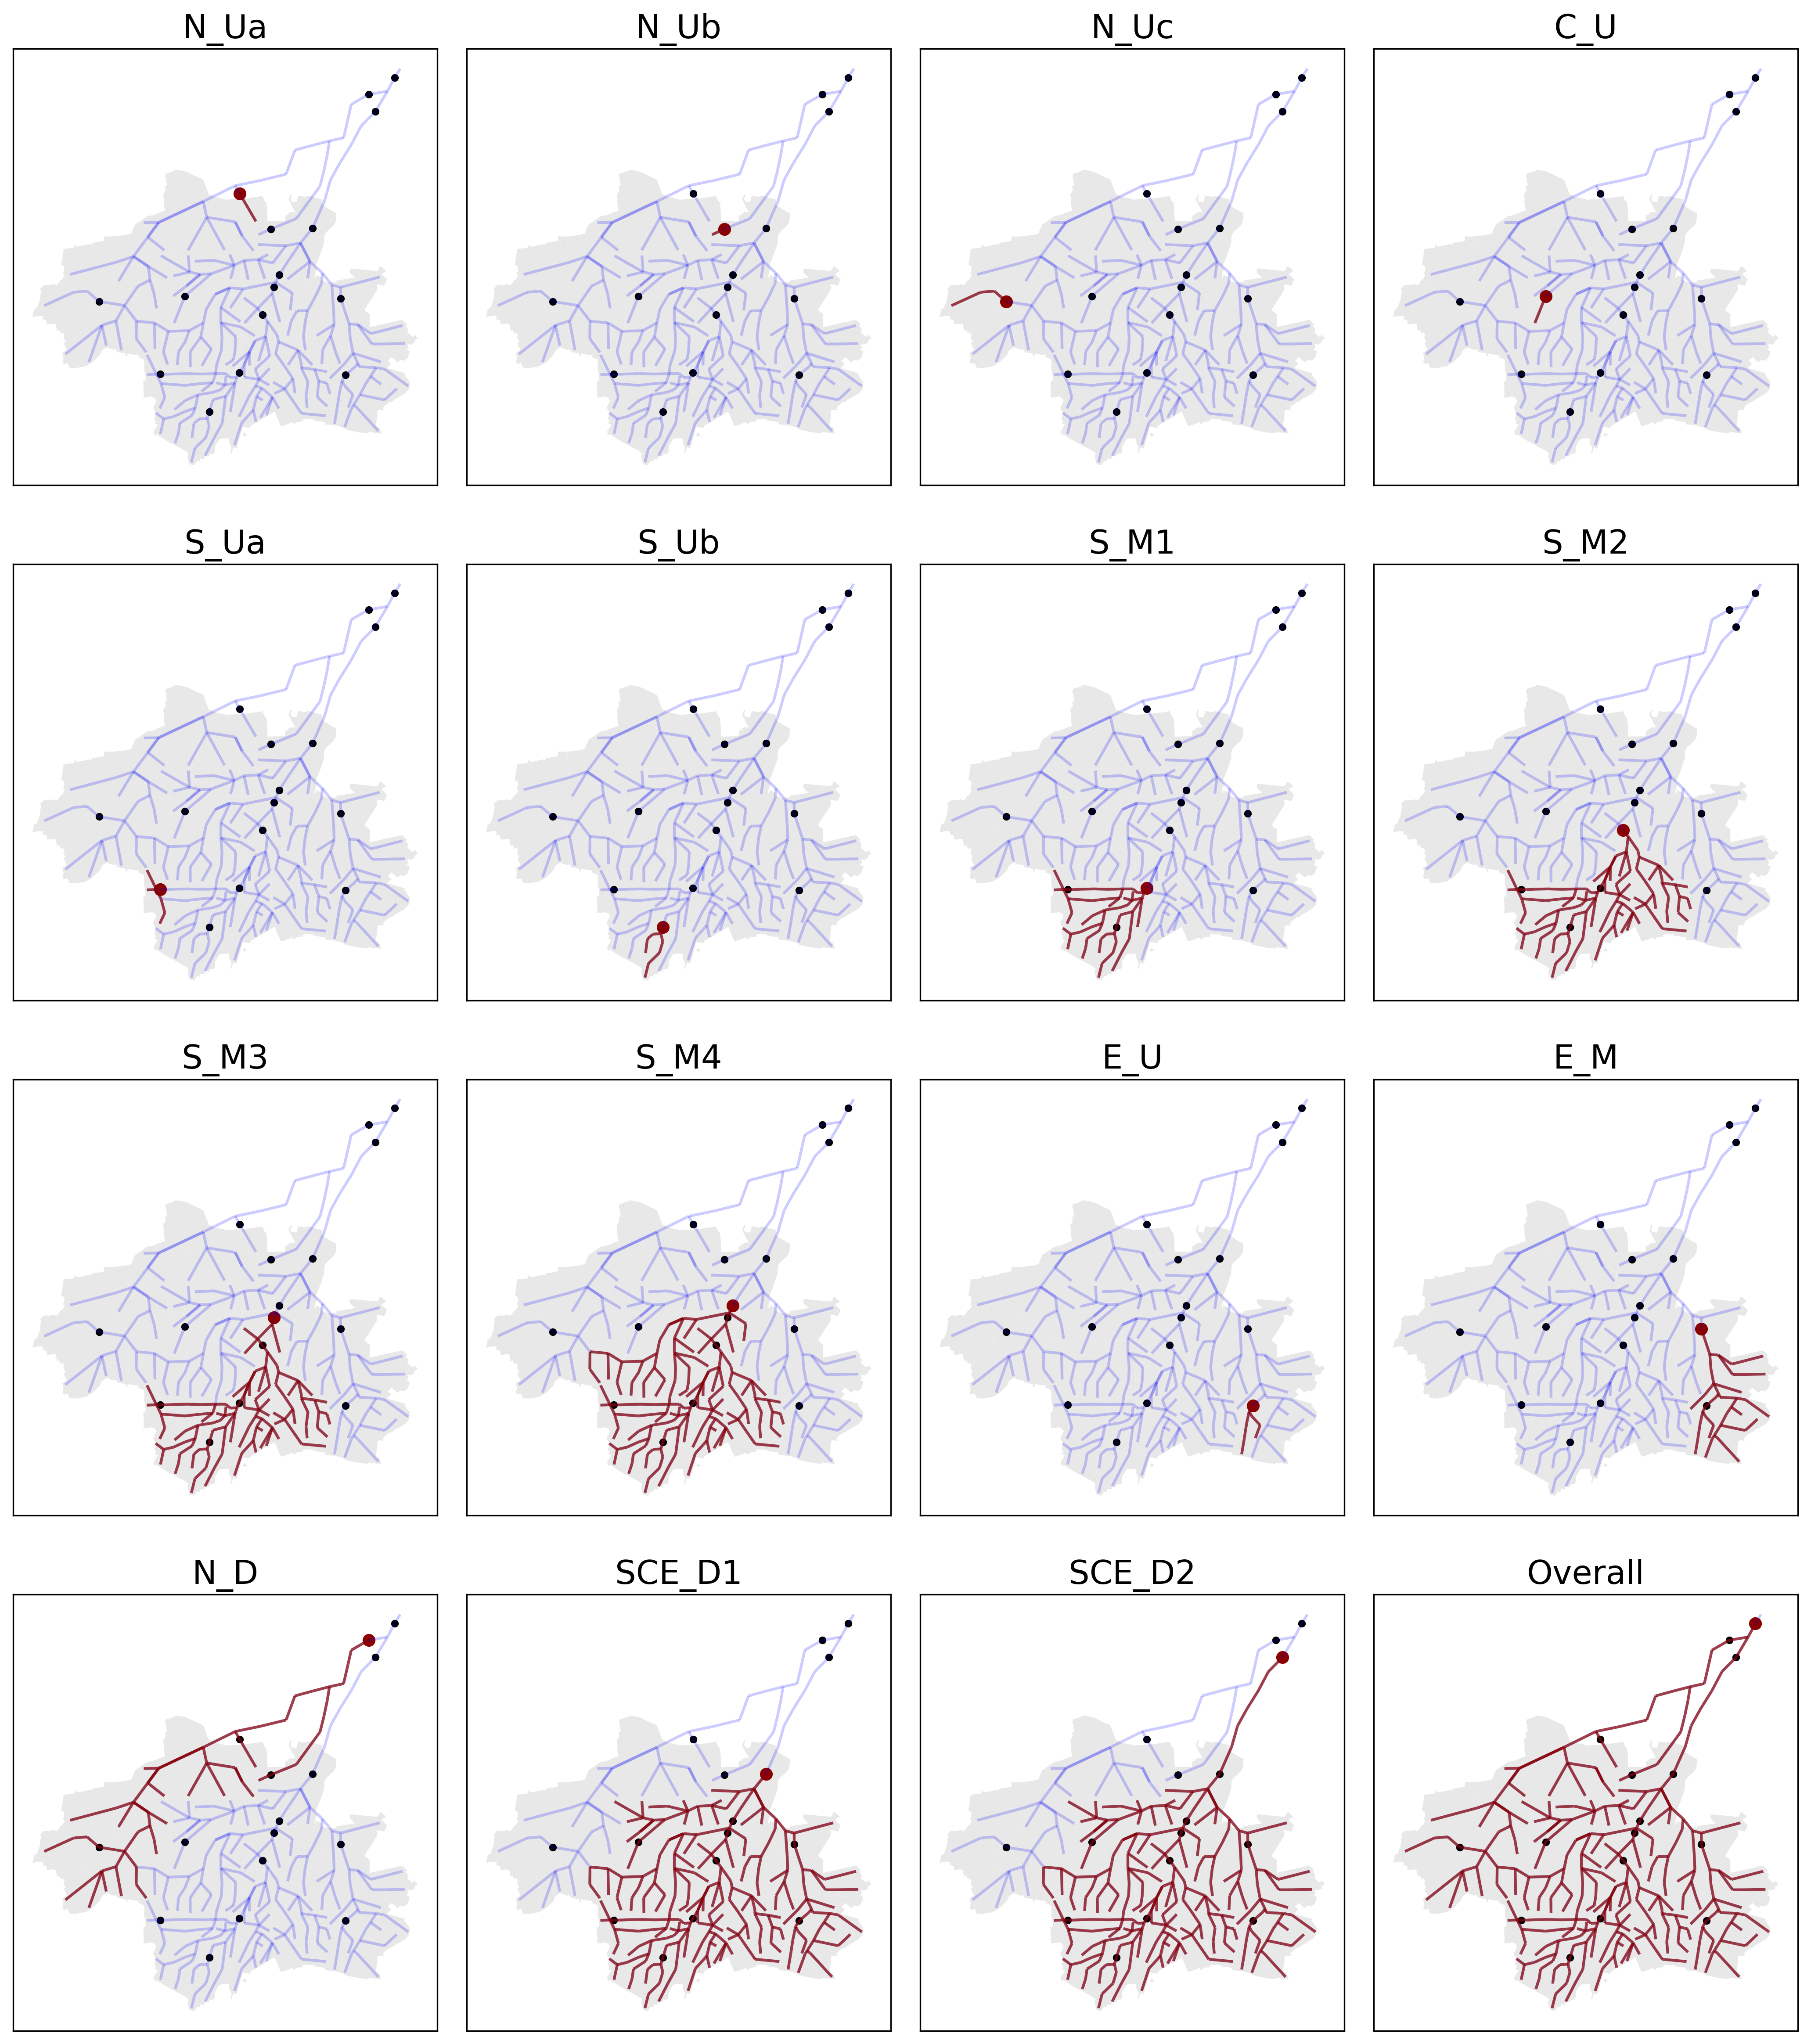

In [20]:
fig, axes = plt.subplots(4, 4, figsize=(14, 16), dpi=300)
axes = axes.flatten()  

locations_sorted = manhole_clear_names.keys()

for idx, station_name in enumerate(locations_sorted):

    clean_station_name = station_name.replace("\n", " ").replace(".", "")

    ax = axes[idx]

    # Load the station-specific highlighted sections
    highlight_abschnitt = gpd.read_file(f"MunichModel_shape/Upstream_Abschnitte/{clean_station_name}/Abschnitte.shp")

    # Plot layers
    gebiete.plot(ax=ax, color='lightgrey', edgecolor=None, alpha=0.5)
    abschnitte.plot(ax=ax, color='blue', alpha=0.2)
    knoten.plot(ax=ax, color='black', markersize=10)

    knoten.loc[knoten['clear_name'] == list(locations_sorted)[idx]].plot(ax=ax, color='darkred')

    highlight_abschnitt.plot(ax=ax, color='darkred', alpha=0.7)

    # Titles, clean axes
    ax.set_title(manhole_clear_names[station_name])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig("../plots/overview_maps/overview_upstream.png", dpi=300, bbox_inches='tight')

/tmp/ipykernel_33270/2420423559.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  touching_gebiete = gebiete[gebiete.geometry.intersects(highlight_abschnitt.unary_union)]
/tmp/ipykernel_33270/2420423559.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  touching_gebiete = gebiete[gebiete.geometry.intersects(highlight_abschnitt.unary_union)]
/tmp/ipykernel_33270/2420423559.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  touching_gebiete = gebiete[gebiete.geometry.intersects(highlight_abschnitt.unary_union)]
/tmp/ipykernel_33270/2420423559.py:16: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  touching_gebiete = gebiete[gebiete.geometry.intersects(highlight_abschnitt.unary_union)]
/tmp/ipykernel_33270/2420423559.py:16: DeprecationWarning: The 'unary_union'

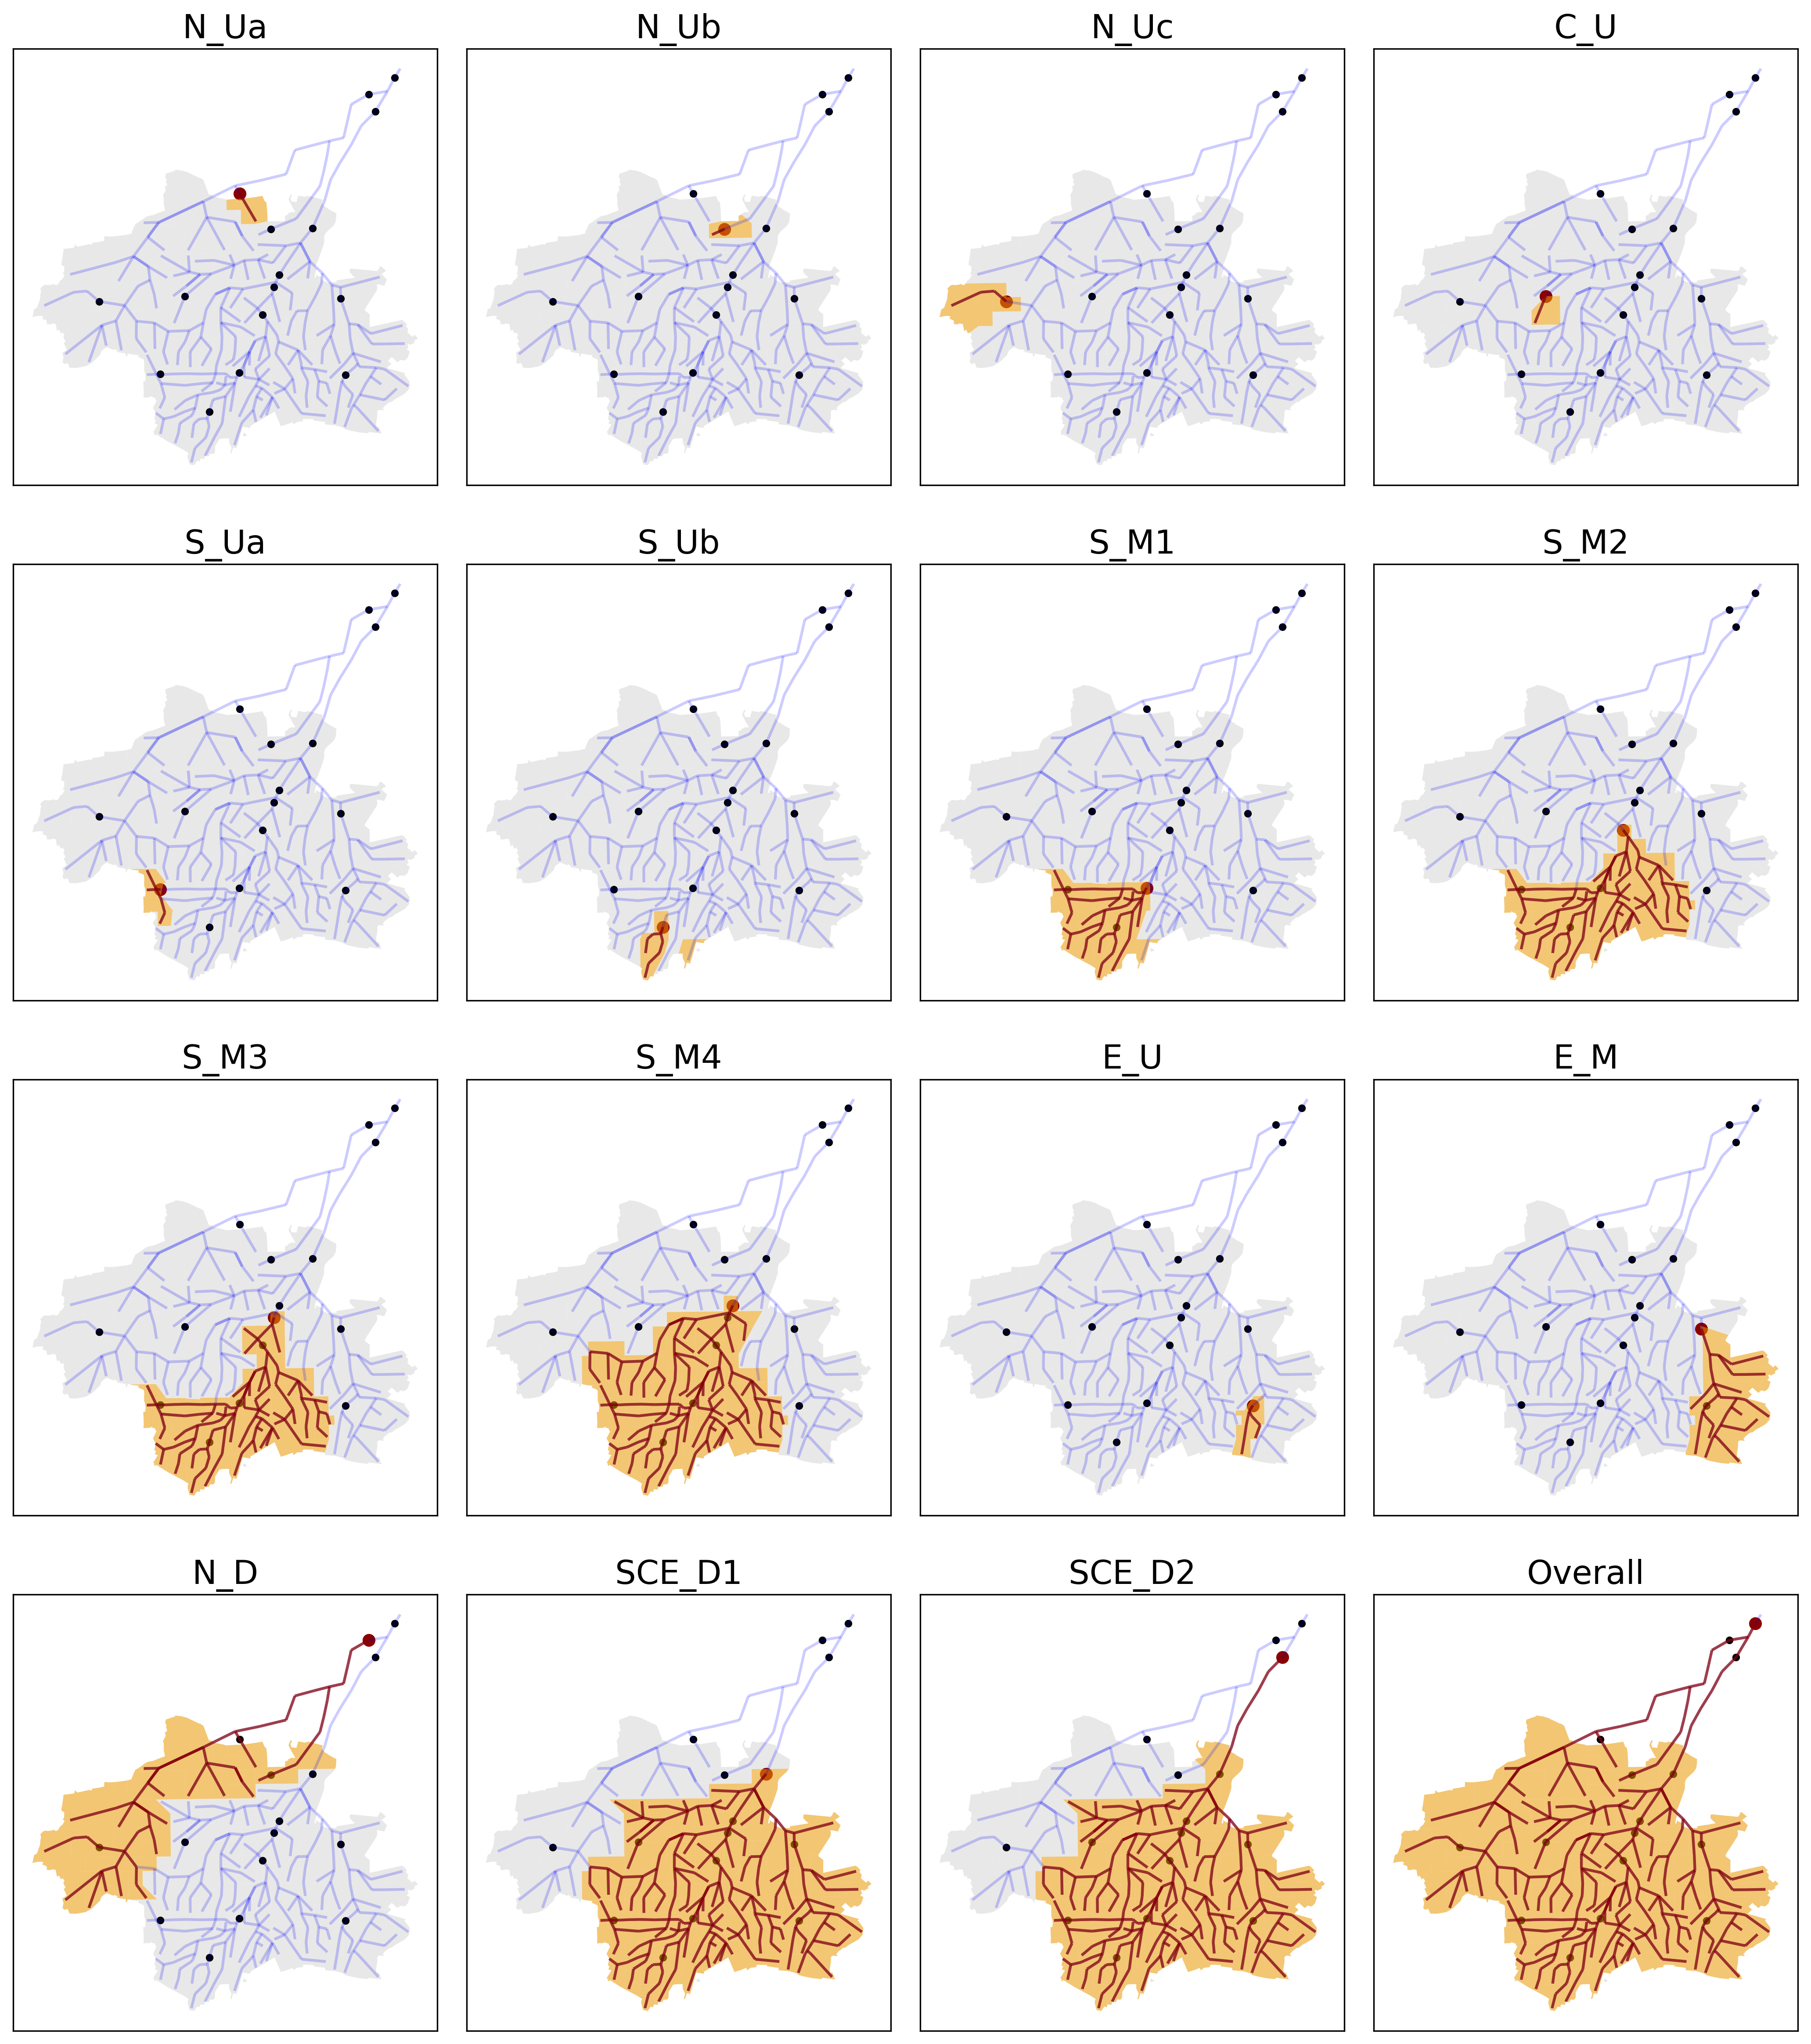

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(14, 16), dpi=300)
axes = axes.flatten()  

locations_sorted = manhole_clear_names.keys()

for idx, station_name in enumerate(locations_sorted):

    clean_station_name = station_name.replace("\n", " ").replace(".", "")

    ax = axes[idx]

    # Load the station-specific highlighted sections
    highlight_abschnitt = gpd.read_file(f"MunichModel_shape/Upstream_Abschnitte/{clean_station_name}/Abschnitte.shp")

    # Find gebiete that touch any of the highlight_abschnitt geometries
    touching_gebiete = gebiete[gebiete.geometry.intersects(highlight_abschnitt.unary_union)]

    # Plot layers
    gebiete.plot(ax=ax, color='lightgrey', edgecolor=None, alpha=0.5)
    abschnitte.plot(ax=ax, color='blue', alpha=0.2)
    knoten.plot(ax=ax, color='black', markersize=10)

    knoten.loc[knoten['clear_name'] == list(locations_sorted)[idx]].plot(ax=ax, color='darkred')

    highlight_abschnitt.plot(ax=ax, color='darkred', alpha=0.7)

    # Plot the touching gebiete with a different color
    touching_gebiete.plot(ax=ax, color='orange', alpha=0.5)

    # Titles, clean axes
    ax.set_title(manhole_clear_names[station_name])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig("../plots/overview_maps/overview_upstream_hightlight_gebiete.png", dpi=300, bbox_inches='tight')


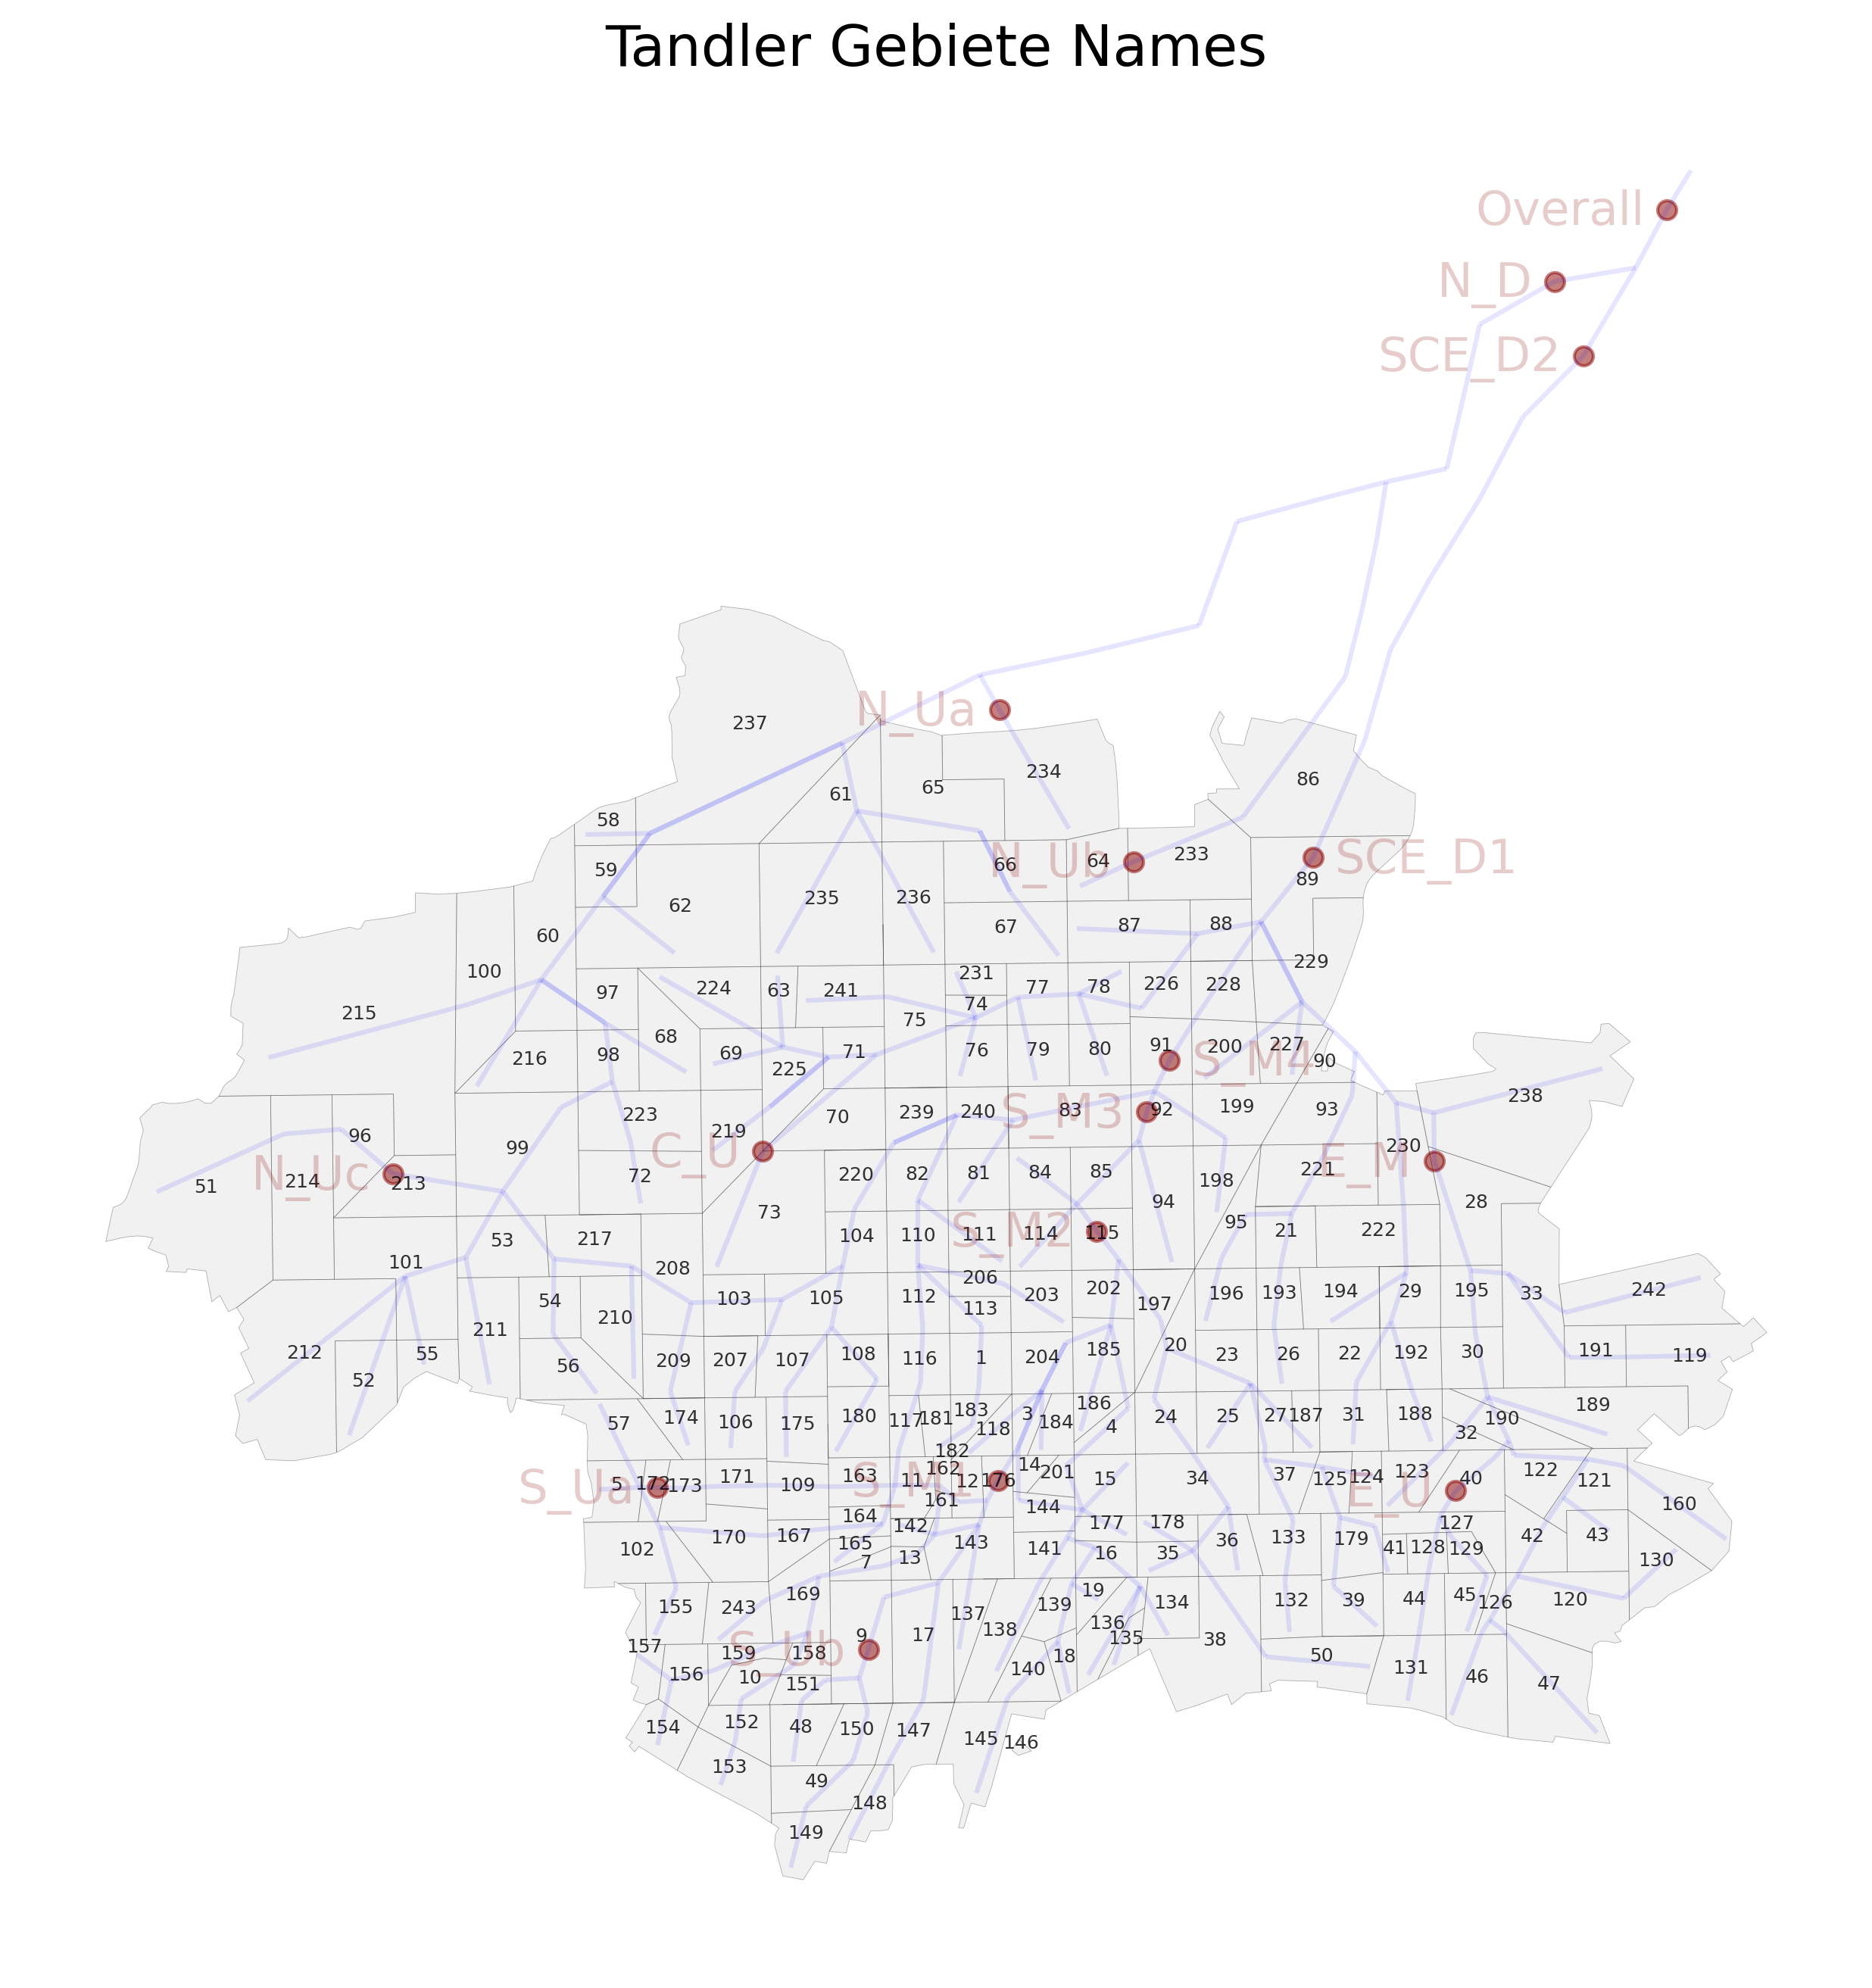

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 9), dpi=300)

# Plot the layers
gebiete.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.2, label='Gebiete', alpha=0.3)
knoten.plot(ax=ax, color='darkred', label='sampling station', alpha=0.5)
abschnitte.plot(ax=ax, color='blue', label='pipe', alpha=0.1)

# Annotate each Gebiet with its name at the centroid
for idx, row in gebiete.iterrows():
    centroid = row.geometry.centroid
    name = row['Name']  # or 'gebiet_name', depending on your column name
    ax.annotate(
        text=name,
        xy=(centroid.x, centroid.y),
        ha='center',
        fontsize=6,
        color='black',
        alpha=0.8
    )


txt_color = "darkred"

# orientation left of point
for idx, row in knoten.iloc[[0,2,3,4,5,6,7,8,9,10,11,12,14,15]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(-7, -5), textcoords="offset points", ha="right", color=txt_color, alpha=0.2)

# orientation right of point
for idx, row in knoten.iloc[[1,13]].iterrows():
    ax.annotate(text=row['name'], xy=(row.geometry.x, row.geometry.y),
                xytext=(7, -5), textcoords="offset points", color=txt_color, alpha=0.2)

# Optional: improve layout
ax.set_axis_off()
ax.set_title("Tandler Gebiete Names")

plt.tight_layout()

plt.savefig("../plots/overview_maps/overview_gebiete_names.png", dpi=300, bbox_inches='tight')
plt.show()
